# Rotated MNIST
* [1. Import data set and create rotations](#1)
* [2. Create a rotated image data set](#2)
* [3. Train two simple FNN](#3)
* [4. Create a group Convolutional layer](#4)
* [5. Train a CNN](#5)

## Import MNIST and create image rotations <a class='anchor' id='1'></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import tensorflow as tf
mnist = tf.keras.datasets.mnist
from tensorflow import keras

In [2]:
def create_data_sets(n):

    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train/255, x_test/255
    
    x = np.concatenate((x_train, x_test))
    y = np.concatenate((y_train, y_test))
    
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation]
    y = y[permutation]
    
    return x[:n], y[:n]

shape of set (10000, 28, 28), (10000,)


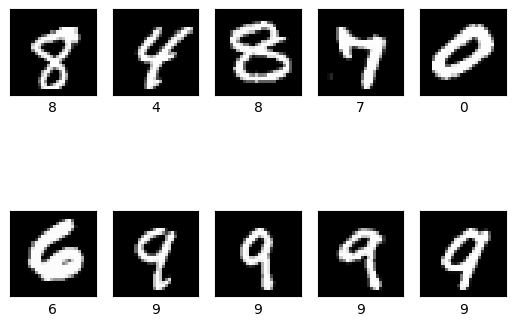

In [3]:
# create and inspect the data sets
n = 10**4
x, y = create_data_sets(n)

print(f'shape of set {x.shape}, {y.shape}')

# plot some training examples
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x[i],
               cmap= 'gray'
               )
    plt.xlabel(f'{y[i]}')
    plt.xticks(())
    plt.yticks(())

In [4]:
def rotate_image(img, n=1):
    '''Rotate image img by n*90 degrees, 
    return the rotated image
    '''
    assert isinstance(n, int)

    n_times = n %4
    if n_times == 0:
        return img
    elif n_times == 1:
        return np.flip(img.T, axis=1)
    elif n_times == 2:
        return np.flip(img, axis=0)
    else:
        return np.flip(img.T, axis=0)


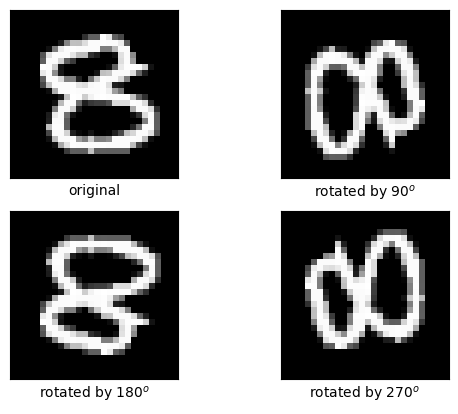

In [5]:
# test the rotation of an image
img_try = x[2]
rotate_imgs = [img_try] + [rotate_image(img_try, n=i) for i in range(1, 4)]
labels = ['original', 'rotated by $90^o$', 'rotated by $180^o$', 'rotated by $270^o$']
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(rotate_imgs[i],
               cmap='grey'
               )
    plt.xlabel(labels[i])
    # plt.axis('off')
    plt.xticks(())
    plt.yticks(())

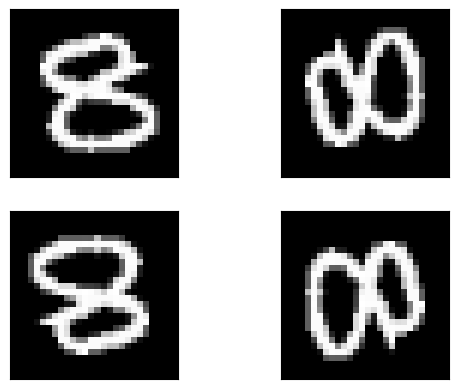

In [6]:
# using tensorflow
img_try = img_try.reshape(28, 28, 1)
for k in range(4):
    # rotate leftwise by multiple of 90 degrees
    img_rotated = tf.image.rot90(img_try, k=k)
    plt.subplot(2, 2, k+1)
    plt.imshow(img_rotated, cmap='gray')
    plt.xticks(())
    plt.yticks(())

## 2. Create a rotated MNIST data set <a class='achor' id='2'></a>

shape of the rotated dataset (10000, 28, 28) with same label (10000,)


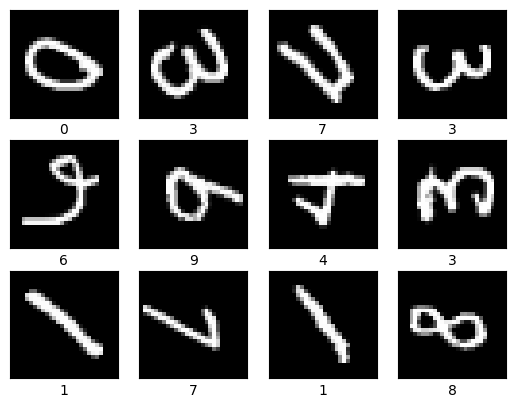

In [7]:
# create as many as original rotated images
n_images = len(x)
x_rotated = np.zeros_like(x)
y_rotated = np.copy(y)
for i in range(n_images):
    img = x[i]
    rotation = np.random.randint(1, 4)
    x_rotated[i, :, :] = rotate_image(img, rotation)

print(f'shape of the rotated dataset {x_rotated.shape} with same label {y_rotated.shape}')

# inspect some of the rotated images
indices = np.random.randint(n_images, size=12)
for j, i in enumerate(indices):
    plt.subplot(3, 4, j+1)
    plt.imshow(x_rotated[i],
               cmap='grey'
               )
    plt.xlabel(y_rotated[i])
    # plt.axis('off')
    plt.xticks(())
    plt.yticks(())

shape of the combine data (20000, 28, 28)
shape of train set (16000, 28, 28), test set (4000, 28, 28)
some images of the train set


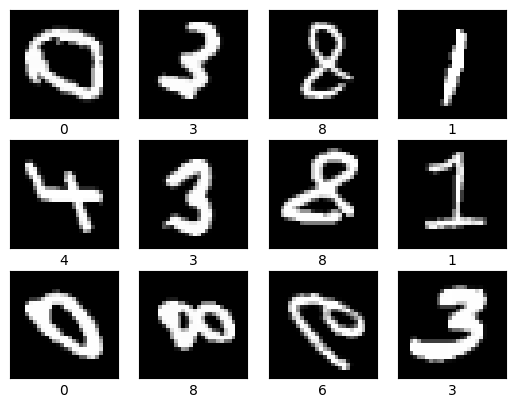

some images of the test set


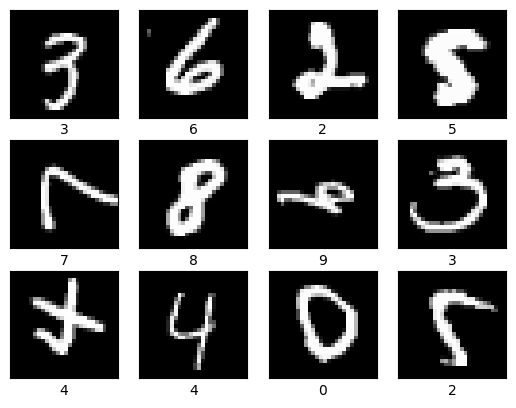

In [8]:
# combine the original and rotated images and create train and test sets
x_combine = np.concatenate((x, x_rotated))
y_combine = np.concatenate((y, y_rotated))
print(f'shape of the combine data {x_combine.shape}')

# shuffle the data
permutation = np.random.permutation(x_combine.shape[0])
x_combine = x_combine[permutation]
y_combine = y_combine[permutation]

x_train, x_test, y_train, y_test = train_test_split(x_combine, y_combine, test_size=0.2)
print(f'shape of train set {x_train.shape}, test set {x_test.shape}')

# inspect soma images of the train set 
print('some images of the train set')
indices = np.random.randint(len(x_train), size=12)
for j, i in enumerate(indices):
    plt.subplot(3, 4, j+1)
    plt.imshow(x_train[i],
               cmap='grey'
               )
    plt.xlabel(y_train[i])
    # plt.axis('off')
    plt.xticks(())
    plt.yticks(())
plt.show()

# inspect soma images of the test set 
print('some images of the test set')
indices = np.random.randint(len(x_test), size=12)
for j, i in enumerate(indices):
    plt.subplot(3, 4, j+1)
    plt.imshow(x_test[i],
               cmap='grey'
               )
    plt.xlabel(y_test[i])
    # plt.axis('off')
    plt.xticks(())
    plt.yticks(())
plt.show()

## Train two simple FNN on the combined set <a class='anchor' id='3'></a> 

In [13]:
input = keras.layers.Input(shape=(28*28, ))
hidden1 = keras.layers.Dense(100, activation='relu')(input)
output = keras.layers.Dense(10, activation='linear')(hidden1)
model_1 = keras.Model(inputs = input, outputs = output, name = 'FNN1')
model_1.summary()

Model: "FNN1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model_1.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer = keras.optimizers.Adam(),
                metrics=['accuracy'],
                )

In [15]:
history1 = model_1.fit(x_train.reshape(x_train.shape[0], -1), y_train,
                       batch_size = 128,
                       validation_data = (x_test.reshape(x_test.shape[0], -1), y_test),
                       epochs = 30,
                       verbose = 1,
                       )

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4799 - loss: 1.5766 - val_accuracy: 0.7412 - val_loss: 0.8448
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7629 - loss: 0.7906 - val_accuracy: 0.7945 - val_loss: 0.6829
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8112 - loss: 0.6344 - val_accuracy: 0.8177 - val_loss: 0.5961
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8466 - loss: 0.5332 - val_accuracy: 0.8435 - val_loss: 0.5389
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8700 - loss: 0.4601 - val_accuracy: 0.8550 - val_loss: 0.4859
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8872 - loss: 0.3967 - val_accuracy: 0.8640 - val_loss: 0.4565
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8985 - loss: 0.3572 - val_accuracy: 0.8698 - val_loss: 0.4347
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9141 - loss: 0.3179 - val_accuracy: 0.

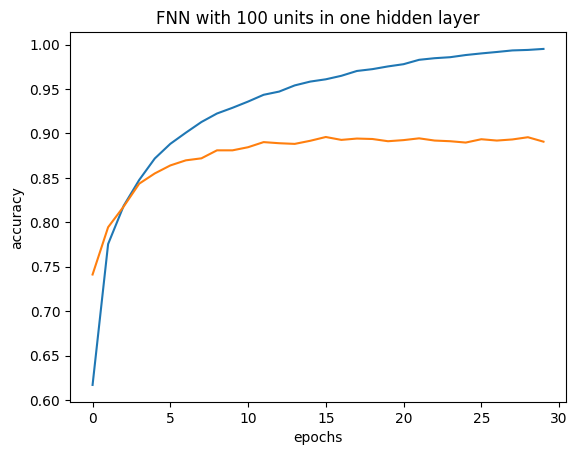

In [16]:
plt.plot(history1.history['accuracy'], label = 'train')
plt.plot(history1.history['val_accuracy'], label = 'test')
plt.title('FNN with 100 units in one hidden layer')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [17]:
# second FNN with 400 hidden units
input = keras.layers.Input(shape=(28*28, ))
hidden2 = keras.layers.Dense(400, activation='relu')(input)
output2 = keras.layers.Dense(10, activation='linear')(hidden2)
model_2 = keras.Model(inputs = input, outputs = output2, name = 'FNN2')
model_2.summary()

Model: "FNN2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         4,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 318,010 (1.21 MB)

 Trainable params: 318,010 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model_2.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer = keras.optimizers.Adam(),
                metrics=['accuracy'],
                )

In [19]:
history2 = model_2.fit(x_train.reshape(x_train.shape[0], -1), y_train,
                       batch_size = 128,
                       validation_data = (x_test.reshape(x_test.shape[0], -1), y_test),
                       epochs = 30,
                       verbose = 1,
                       )

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5653 - loss: 1.3444 - val_accuracy: 0.8035 - val_loss: 0.6847
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8230 - loss: 0.6091 - val_accuracy: 0.8520 - val_loss: 0.5046
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8822 - loss: 0.4246 - val_accuracy: 0.8677 - val_loss: 0.4329
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9106 - loss: 0.3234 - val_accuracy: 0.8827 - val_loss: 0.3728
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9348 - loss: 0.2493 - val_accuracy: 0.8980 - val_loss: 0.3450
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9491 - loss: 0.2010 - val_accuracy: 0.8985 - val_loss: 0.3214
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9603 - loss: 0.1624 - val_accuracy: 0.9053 - val_loss: 0.3096
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9721 - loss: 0.1296 - val_accura

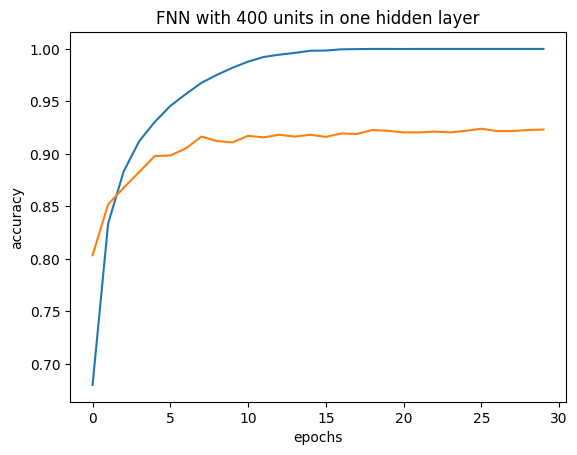

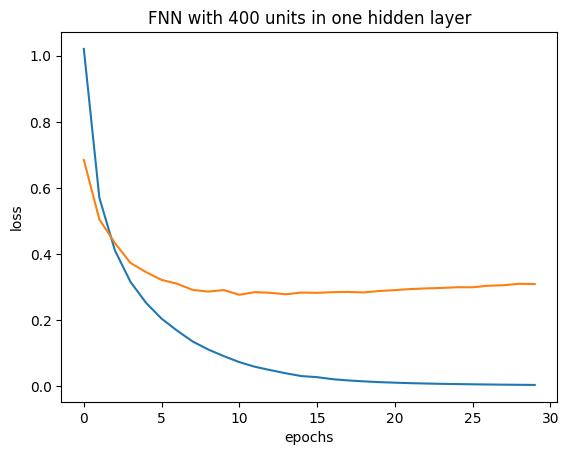

In [20]:
plt.plot(history2.history['accuracy'], label = 'train')
plt.plot(history2.history['val_accuracy'], label = 'test')
plt.title('FNN with 400 units in one hidden layer')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

plt.plot(history2.history['loss'], label = 'train')
plt.plot(history2.history['val_loss'], label = 'test')
plt.title('FNN with 400 units in one hidden layer')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

## Create a group convolution layer <a class='anchor' id='4'></a>

We create our own custom group convolution layer by the following:
- for input $(n, \,n_H^{[l-1]}, \, n_W^{[l-1]}, \,n_c^{[l-1]})$
- apply normal conv2D with $n_f$ number of filters of dimensions $(f, f)$ with stride $s$, padding $p4$
- output has dimension $(n, \,n_H^{[l]}, \, n_W^{[l]}, \,n_f)$ with $n_{H/W}^{[l]} = \lfloor \frac{n_{H/W}^{[l-1]} -f+2p}{s}\rfloor +1$
- for each one of the filters define 3 more as a result of rotation of the original by $90, 180, 270$ degrees respectively, with the same weights
- concatenate the filters and perform the convolution 

In [ ]:
class GroupConv2D(keras.layers.Layer):

    def __init__(self, filters = 1, kernel_size = 3, strides = (1, 1), padding = 'valid'):
        super().__init__()
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
        self.padding = padding

    def build(self, input_shape):
        # define the weight to be of the form (f, f, n_c, n_c') where n_c is the number of channels of the input, n_c' number of filters
        self.w = self.add_weight(
            shape = (self.kernel_size, self.kernel_size, input_shape[-1], self.filters),
            initializer = 'random_normal',
            trainable = True,
        )

        # maybe add bias

    def call(self, input):
        # print(f'shape {input.shape}, w {self.w.shape}')
        rotated_filters = []
        # loop through the number of 3-dim filters and for each one define 3-more rotated filters
        for filter_number in range(self.filters):
            filter = self.w[:,:,:,filter_number]
            for k in range(4):
                rotated_filter = tf.image.rot90(filter, k=k)
                rotated_filters.append(rotated_filter)
        
        all_filters = tf.stack(rotated_filters, axis=-1)
        # print(all_filters.shape)
        
        # # plot the filters
        # for f in rotated_filters:
        #     plt.imshow(f)
        #     plt.show()

        return tf.nn.conv2d(input, all_filters, self.strides, self.padding.upper())
    
    def get_config(self):
        config = super().get_config()
        config.update({
            'kernel_size': self.kernel_size,
            'strides': self.strides,
            'padding': self.padding,
            
            })
        return config

## Train a model with our custom made GroupConvolution layer <a class='anchor' id='5'></a>

In [35]:
input = keras.layers.Input(shape=(28, 28, 1))

my_conv_layer1 = GroupConv2D(filters=8, kernel_size=3)(input)
maxpool1 = keras.layers.MaxPooling2D((2,2))(my_conv_layer1)

my_conv_layer2 = GroupConv2D(filters=16, kernel_size=3)(maxpool1)
maxpool2 = keras.layers.MaxPooling2D((2,2))(my_conv_layer2)

flat = keras.layers.Flatten()(maxpool2)
hidden3 = keras.layers.Dense(200, activation='relu')(flat)
output3 = keras.layers.Dense(10, activation='linear')(hidden3)
model_3 = keras.Model(inputs = input, outputs = output3, name = 'mymodel')
model_3.summary()

Model: "mymodel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ group_conv2d_11 (GroupConv2D)   │ (None, 26, 26, 32)     │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ group_conv2d_12 (GroupConv2D)   │ (None, 11, 11, 64)     │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 200)            │       320,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 326,890 (1.25 MB)

 Trainable params: 326,890 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model_3.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer = keras.optimizers.Adam(),
                metrics=['accuracy'],
                )

In [37]:
history3 = model_3.fit(x_train.reshape(x_train.shape[0], 28, 28, 1), y_train,
                       batch_size = 128,
                       validation_data = (x_test.reshape(x_test.shape[0], 28, 28, 1), y_test),
                       epochs = 30,
                       verbose = 1,
                       )

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 72s 182ms/step - accuracy: 0.5395 - loss: 1.4263 - val_accuracy: 0.8357 - val_loss: 0.5405
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.8551 - loss: 0.4741 - val_accuracy: 0.8917 - val_loss: 0.3433
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.9188 - loss: 0.2665 - val_accuracy: 0.9178 - val_loss: 0.2794
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.9394 - loss: 0.1886 - val_accuracy: 0.9283 - val_loss: 0.2291
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - accuracy: 0.9602 - loss: 0.1284 - val_accuracy: 0.9337 - val_loss: 0.2160
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.9708 - loss: 0.0948 - val_accuracy: 0.9325 - val_loss: 0.2385
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9781 - loss: 0.0698 - val_accuracy: 0.9358 - val_loss: 0.2377
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9823 - loss: 0.0536 - val

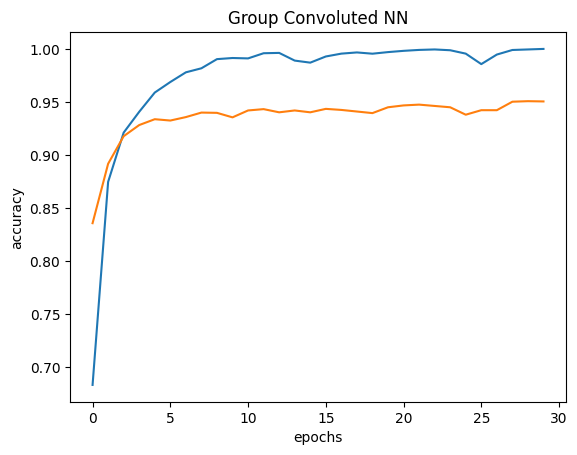

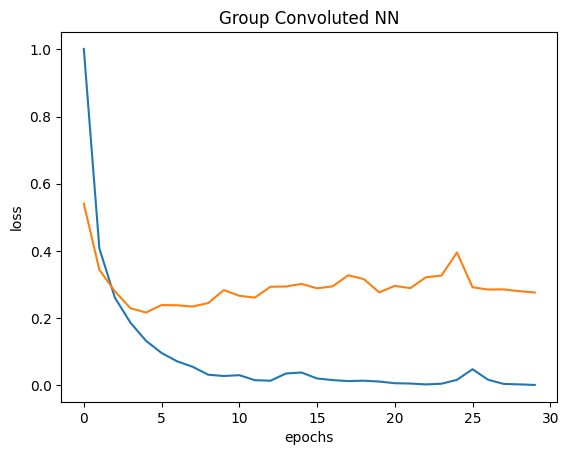

In [38]:
plt.plot(history3.history['accuracy'], label = 'train')
plt.plot(history3.history['val_accuracy'], label = 'test')
plt.title('Group Convoluted NN')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

plt.plot(history3.history['loss'], label = 'train')
plt.plot(history3.history['val_loss'], label = 'test')
plt.title('Group Convoluted NN')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

## Normal Convolutional NN

In [47]:
input = keras.layers.Input(shape=(28, 28, 1))

conv_layer1 = keras.layers.Conv2D(filters=8, kernel_size=3)(input)
maxpool1 = keras.layers.MaxPooling2D((2,2))(conv_layer1)

conv_layer2 = keras.layers.Conv2D(filters=16, kernel_size=3)(maxpool1)
maxpool2 = keras.layers.MaxPooling2D((2,2))(conv_layer2)

flat = keras.layers.Flatten()(maxpool2)
hidden4 = keras.layers.Dense(200, activation='relu')(flat)
output4 = keras.layers.Dense(10, activation='linear')(hidden4)
model_4 = keras.Model(inputs = input, outputs = output4, name = 'mymodel')
model_4.summary()

Model: "mymodel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,458 (326.01 KB)

 Trainable params: 83,458 (326.01 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model_4.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer = keras.optimizers.Adam(),
                metrics=['accuracy'],
                )

In [50]:
history4 = model_4.fit(x_train.reshape(x_train.shape[0], 28, 28, 1), y_train,
                       batch_size = 128,
                       validation_data = (x_test.reshape(x_test.shape[0], 28, 28, 1), y_test),
                       epochs = 30,
                       verbose = 1,
                       )

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.4904 - loss: 1.5902 - val_accuracy: 0.7955 - val_loss: 0.6628
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8247 - loss: 0.5855 - val_accuracy: 0.8695 - val_loss: 0.4294
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8811 - loss: 0.3983 - val_accuracy: 0.8938 - val_loss: 0.3413
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9104 - loss: 0.2913 - val_accuracy: 0.9135 - val_loss: 0.2750
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9361 - loss: 0.2127 - val_accuracy: 0.9160 - val_loss: 0.2613
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9461 - loss: 0.1754 - val_accuracy: 0.9308 - val_loss: 0.2349
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9578 - loss: 0.1449 - val_accuracy: 0.9385 - val_loss: 0.2040
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9675 - loss: 0.1100 - val_accu

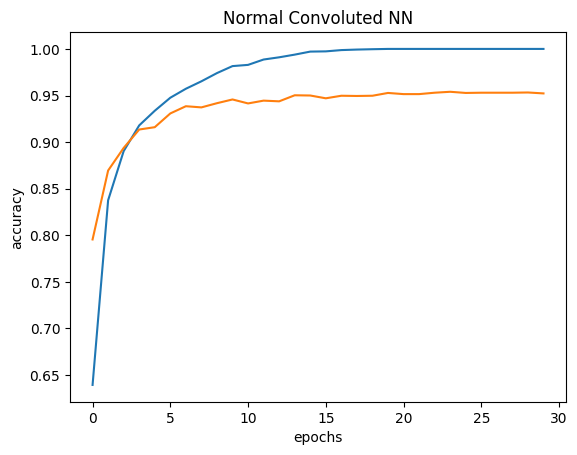

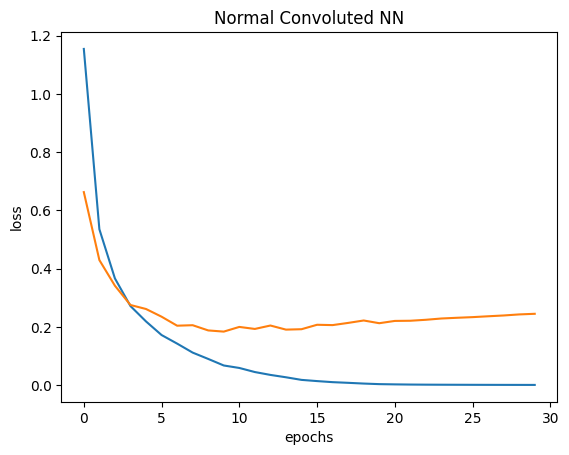

In [51]:
plt.plot(history4.history['accuracy'], label = 'train')
plt.plot(history4.history['val_accuracy'], label = 'test')
plt.title('Normal Convoluted NN')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

plt.plot(history4.history['loss'], label = 'train')
plt.plot(history4.history['val_loss'], label = 'test')
plt.title('Normal Convoluted NN')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()